# Exploring SVMs  
This notebook illsutrates some of the SVM concepts that we convered in class.

## Using package e1071

In [1]:
options(repr.plot.width=7, repr.plot.height=6)

In [2]:
#install the package
install.packages("e1071")

Installing package into ‘/home/vagrant/R/x86_64-pc-linux-gnu-library/3.2’
(as ‘lib’ is unspecified)



The downloaded source packages are in
	‘/tmp/Rtmp7lyF0O/downloaded_packages’


In [3]:
# load the library
# Note that e1071 contains other classification and clustering methods and is a useful library to keep in your toolbox.
library(e1071)

Credits - Section 9.6  
Example from Introduction to Statistical Learning  
http://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf

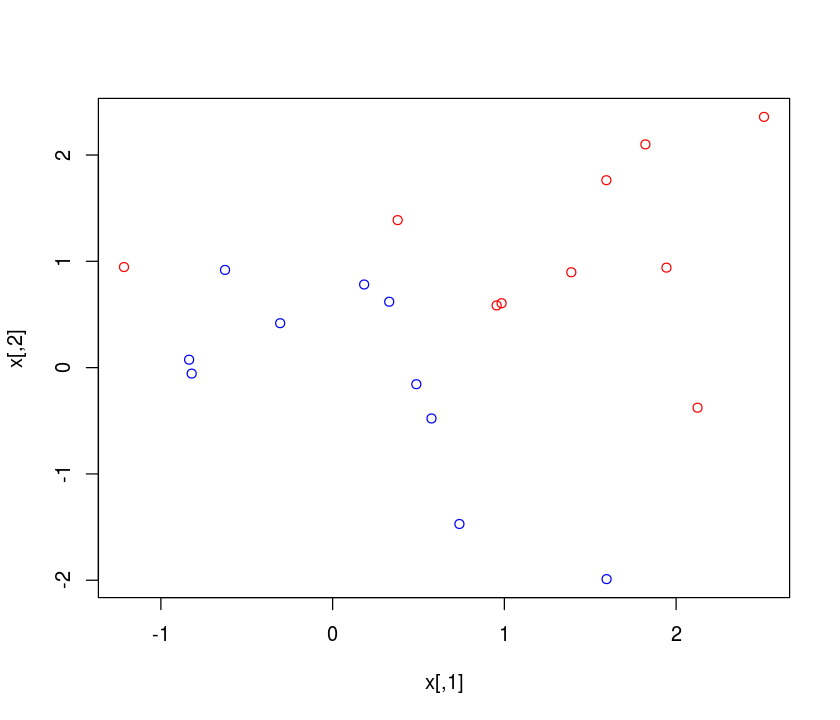

In [4]:
# Let's Generate some data
set.seed (1)
x <- matrix (rnorm (20*2) , ncol =2)
y <- c(rep (-1,10) , rep (1 ,10) )
x[y==1 ,]= x[y==1,] + 1
plot(x, col =(3-y))

Note - To use svm()  to perform classification. Encode the response as a factor variable. 

In [5]:
dat<-data.frame(x=x, y=as.factor(y))

In [6]:
head(dat, 3)
str(dat)

x.1,x.2,y
-0.6264538,0.91897737,-1
0.1836433,0.78213630,-1
-0.8356286,0.07456498,-1


'data.frame':	20 obs. of  3 variables:
 $ x.1: num  -0.626 0.184 -0.836 1.595 0.33 ...
 $ x.2: num  0.919 0.7821 0.0746 -1.9894 0.6198 ...
 $ y  : Factor w/ 2 levels "-1","1": 1 1 1 1 1 1 1 1 1 1 ...


In [7]:
# svm i sused to train a support vector machine
# Various arguments are interesting - In this case you will see that we are using a linear kernel
# You can also explore other kerney and observe how the decision boundary changes.
# Various kernels are available - linear, polynomial, radial basis, and sigmoid.


# You will also notice that we are using a cost = 10. 
# Cost refers to the C constant of the regularization term in a Lagrang formulae
svmfit<-svm(y~., data=dat, kernel="linear", cost=10, scale=FALSE)

[1]  1  2  5  7 14 16 17


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




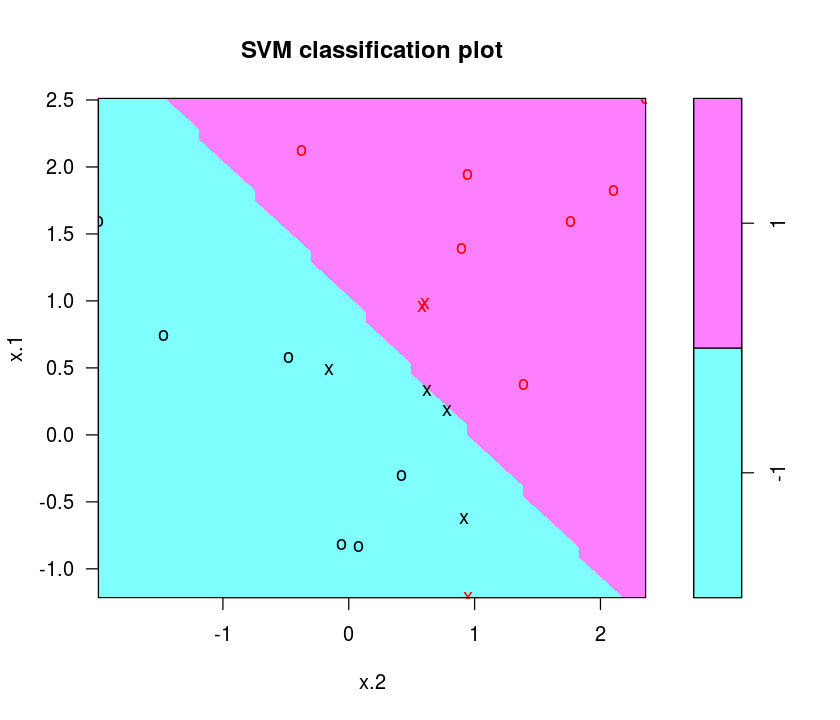

In [8]:
# Visualize the decision boundary
plot(svmfit , dat)
svmfit$index
summary (svmfit )

In [9]:
# Try using a smaller cost value and see how it impacts the decision boundary
svmfit<-svm(y~., data=dat, kernel="linear", cost=0.1, scale=FALSE)

[1]  1  2  3  4  5  7  9 10 12 13 14 15 16 17 18 20


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 0.1, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




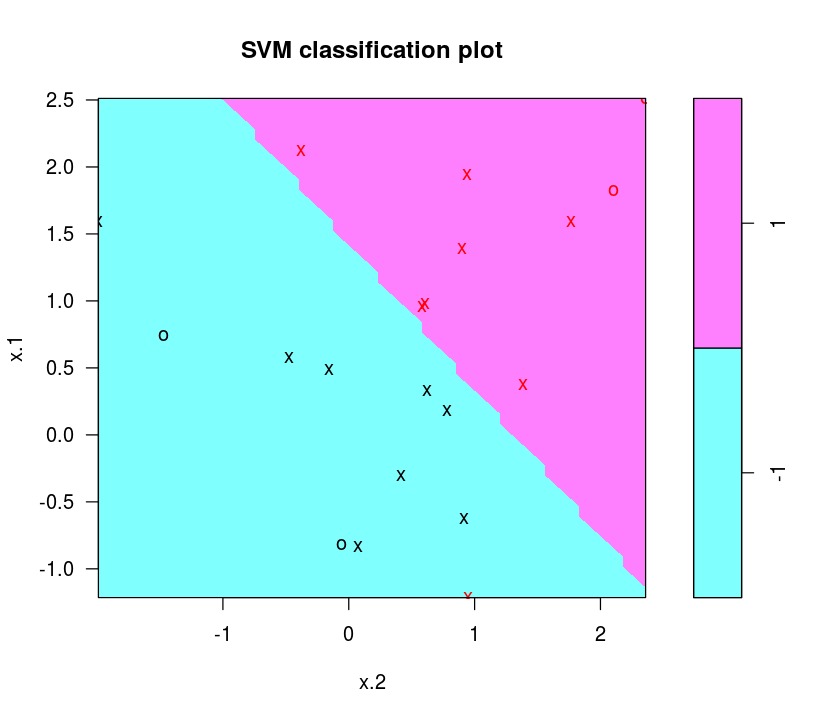

In [10]:
plot(svmfit , dat)
svmfit$index
summary (svmfit )

## Parameter Tuning

In [11]:
# specify a range of value for cost
set.seed (1)
tune.out<-tune(svm ,y~.,data=dat ,kernel ="linear",
        ranges =list(cost=c(0.001 , 0.01, 0.1, 1,5,10,100) ))
summary(tune.out)

# get the best model
bestmod <-tune.out$best.model
summary (bestmod )


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.1 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.70  0.4216370
2 1e-02  0.70  0.4216370
3 1e-01  0.10  0.2108185
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229



Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




## Using Kernlab  
Credits: https://escience.rpi.edu/data/DA/svmbasic_notes.pdf

In [12]:
# Generate data using Gaussian distribution
numDataPoints <- 150 # number of data points
numDim <- 2 # dimension

In [13]:
# Specify variance of the distribution
sigma <- 1 

 # Specify centre of the distribution of positive examples
meanpos <- 0

 # centre of the distribution of negative examples
meanneg <- 3

# number of positive and negative examples
npos <- round(numDataPoints/2) 
nneg <- numDataPoints -npos


In [14]:
# Generate positive and negative examples
xpos <- matrix(rnorm(npos * numDim,mean=meanpos,sd=sigma),npos,numDim)
xneg <- matrix(rnorm(nneg * numDim,mean=meanneg,sd=sigma),npos,numDim)
x <- rbind(xpos,xneg)

head(x)

1.51178117,0.3329504
0.38984324,1.0630998
-0.62124058,-0.3041839
-2.21469989,0.3700188
1.12493092,0.2670988
-0.04493361,-0.5425200


In [15]:
# Specify the label
y <- matrix(c(rep(1,npos),rep(-1,nneg)))
table(y)

y
-1  1 
75 75 

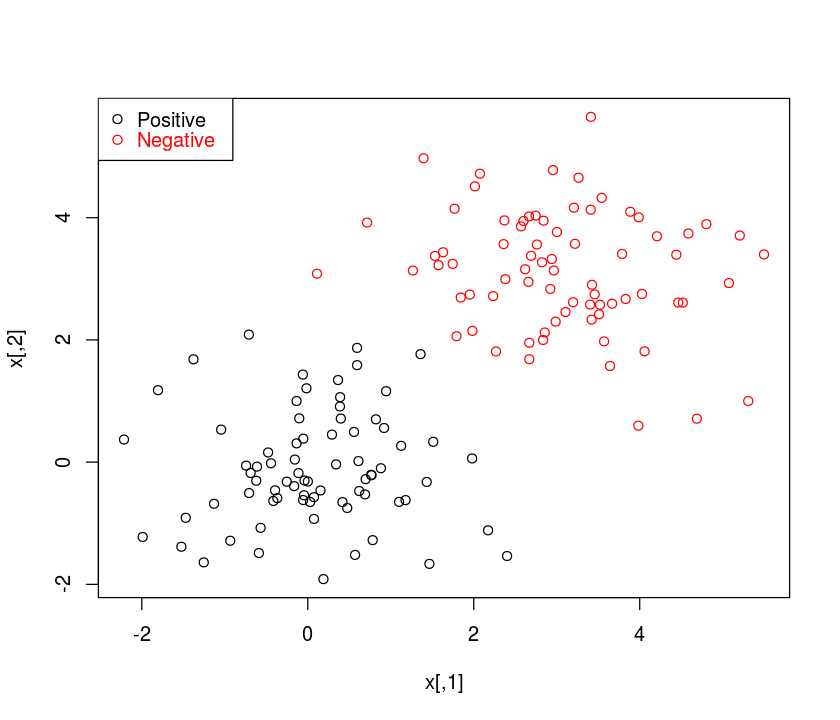

In [16]:
# Visualize the data
plot(x,col=ifelse(y>0,1,2))
legend("topleft",c('Positive','Negative'),col=seq(2),pch=1,text.col=seq(2))


In [17]:
# Specify training and test datasets
## Prepare a training and a test set ##
ntrain <- round(numDataPoints *0.8) # number of training examples
tindex <- sample(numDataPoints,ntrain) # indices of training samples
xtrain <- x[tindex,]
xtest <- x[-tindex,]
ytrain <- y[tindex]
ytest <- y[-tindex]

istrain=rep(0,numDataPoints)
istrain[tindex]=1



In [18]:
head(xtrain)
head(xtest)

2.5997533,3.9451850
-0.2533617,-0.3199929
2.3807570,2.9946560
1.3586796,1.7672873
-1.0441346,0.5314962
2.9652740,3.1362219


-0.04493361,-0.54252003
-0.05612874,-0.62036668
-0.15579551,0.04211587
-1.47075238,-0.91092165
0.41794156,-0.65458464
-0.39428995,-0.46164473


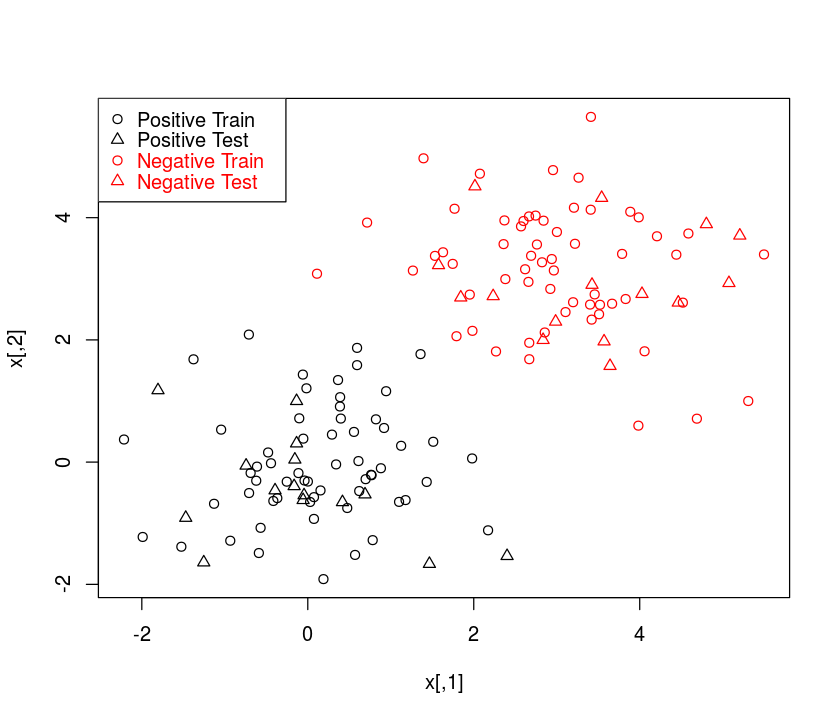

In [19]:
# Visualize
plot(x,col=ifelse(y>0,1,2),pch=ifelse(istrain==1,1,2))
legend("topleft",c('Positive Train','Positive Test','Negative Train','Negative Test'),
       col=c(1,1,2,2),pch=c(1,2,1,2),text.col=c(1,1,2,2))


In [20]:
# Use the kernlab package
library(kernlab)



In [21]:
# Train the SVM with different kernel (linear, rbf, polynomial)
# Observe the number of suppor vectors

# SVM Training linear
svp <- ksvm(xtrain,ytrain,type="C-svc",kernel='vanilladot',C=100,scaled=c())
svp

# SVM Training with rbf
svpRBF <- ksvm(xtrain,ytrain,type="C-svc",kernel='rbfdot',C=100,scaled=c())
svpRBF


# SVM Training with polynomial
svpPoly <- ksvm(xtrain,ytrain,type="C-svc",kernel='polydot',C=100,scaled=c())
svpPoly

 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 100 

Linear (vanilla) kernel function. 

Number of Support Vectors : 3 

Objective Function Value : -10.6559 
Training error : 0 

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 100 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.856367089032532 

Number of Support Vectors : 41 

Objective Function Value : -11.7851 
Training error : 0 

 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 100 

Polynomial kernel function. 
 Hyperparameters : degree =  1  scale =  1  offset =  1 

Number of Support Vectors : 3 

Objective Function Value : -10.6559 
Training error : 0 

In [22]:
# Attributes that you can access
attributes(svp)


$param
$param$C
[1] 100


$scaling
`\001NULL\001`

$coef
$coef[[1]]
[1] 10.650641 -4.074643 -6.575998


$alphaindex
$alphaindex[[1]]
[1]  4 40 48


$b
[1] -11.24837

$obj
[1] -10.65586

$SVindex
[1]  4 40 48

$nSV
[1] 3

$prior
$prior[[1]]
$prior[[1]]$prior1
[1] 60

$prior[[1]]$prior0
[1] 60



$prob.model
$prob.model[[1]]
NULL


$alpha
$alpha[[1]]
[1] 10.650641  4.074643  6.575998


$type
[1] "C-svc"

$kernelf
function (x, y = NULL) 
{
    if (!is(x, "vector")) 
        stop("x must be a vector")
    if (!is(y, "vector") && !is.null(y)) 
        stop("y must be a vector")
    if (is(x, "vector") && is.null(y)) {
        crossprod(x)
    }
    if (is(x, "vector") && is(y, "vector")) {
        if (!length(x) == length(y)) 
            stop("number of dimension must be the same on both data points")
        crossprod(x, y)
    }
}
<environment: 0x47091a0>
attr(,"kpar")
list()
attr(,"class")
[1] "vanillakernel"
attr(,"class")attr(,"package")
[1] "kernlab"

$kpar
list()

$xmatrix
$xmatrix[

In [23]:
# For example, the support vectors
alpha(svp)
alphaindex(svp)
b(svp)


[[1]]
[1] 10.650641  4.074643  6.575998

[[1]]
[1]  4 40 48

[1] -11.24837

### Visualizing the plots  
Decision boundary and support vectors

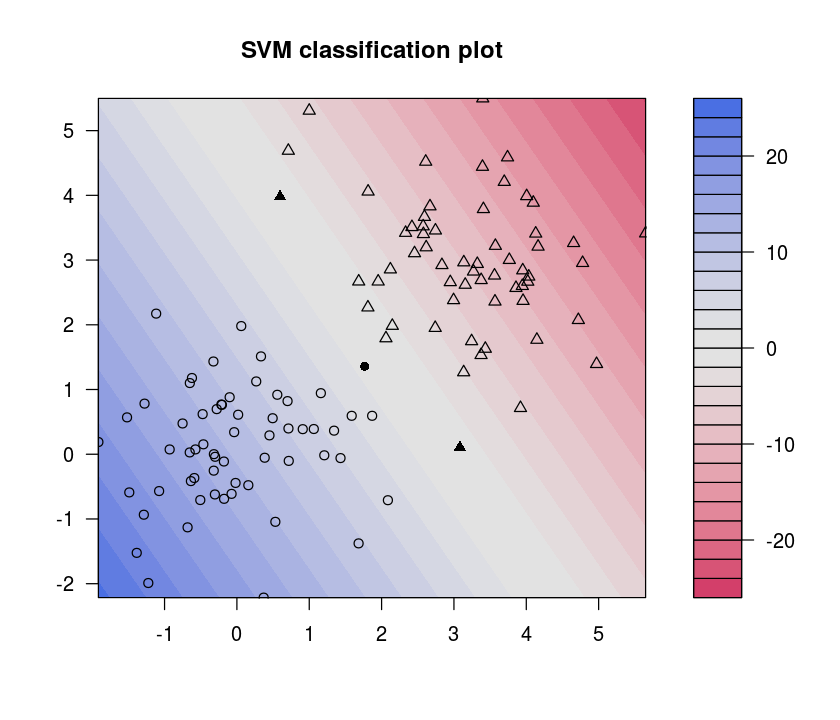

In [24]:
# Use the built-in function to pretty-plot the classifier
plot(svp,data=xtrain)


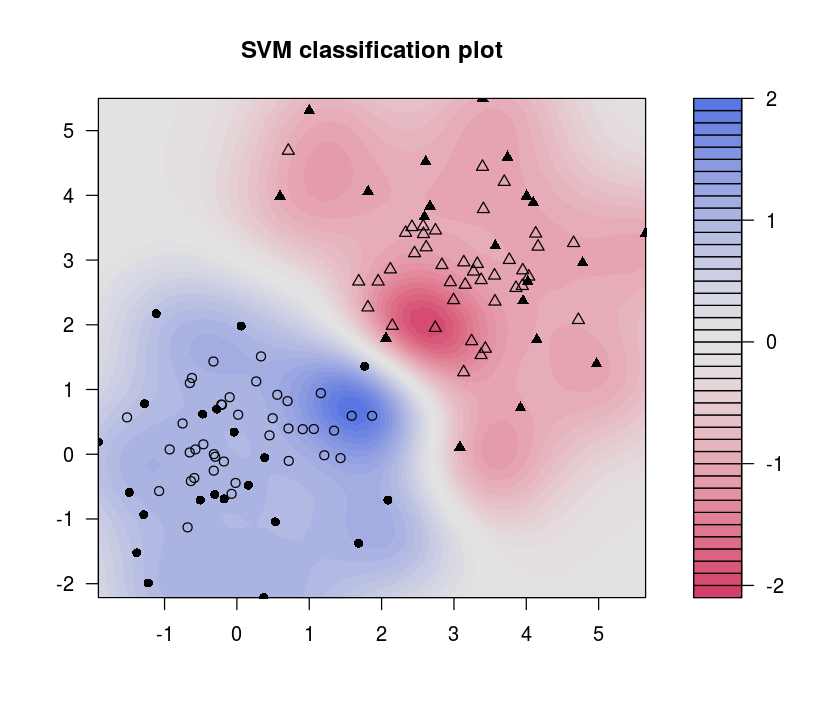

In [25]:
plot(svpRBF,data=xtrain)


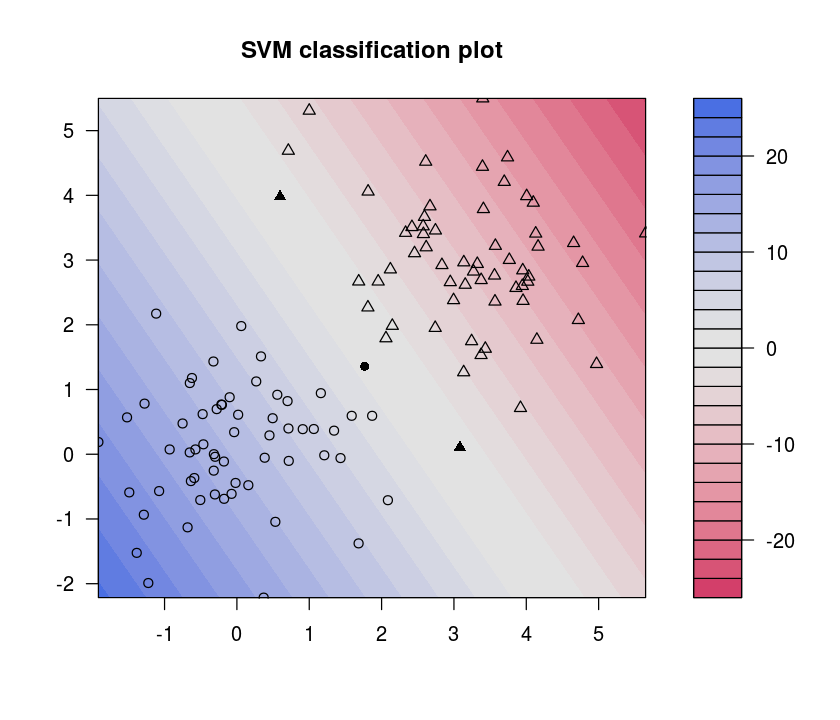

In [26]:
plot(svpPoly,data=xtrain)